
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Javier Pizarro Wittke

**Rol**: 201510520-0

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
#Tipo de datos del dataframe
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

In [7]:
#Datos distintos en la columna target
digits['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#Registros por clase
(a,b)=np.unique(digits['target'],return_counts=True)
for i in range(10):
    print('hay', b[i] ,'registros de la clase' ,a[i])

hay 178 registros de la clase 0
hay 182 registros de la clase 1
hay 177 registros de la clase 2
hay 183 registros de la clase 3
hay 181 registros de la clase 4
hay 182 registros de la clase 5
hay 181 registros de la clase 6
hay 179 registros de la clase 7
hay 174 registros de la clase 8
hay 180 registros de la clase 9


In [9]:
#Información sobre la cantidad de elementos
promedio=b.mean()
maximo=b.max()
minimo=b.min()
print((promedio,maximo,minimo))

(179.7, 183, 174)


El dataframe posee 1797 filas y 64 columnas, arrojando un total de 116805 datos, los cuales utilizan 456.4 KB de memoria. Destacar que todos los datos corresponden al tipo Int32 no exisistiendo valores nulos.  Por otro lado, y tomando en cuenta que las clases vienen dadas por la columna target, se puede ver que existen 10 clases rotuladas del 0 al 9, las cuales poseen las cantidades de elementos mostradas anteriormente. Se puede deducir que el promedio de datos por clase es de 179.7 elementos con un máximo de 183 elementos asociado a la clase 3 y un minimo de 174 asociado a la clase 8. Se adjunta histograma que muestra la cantidad de datos que hay por clase.

<AxesSubplot:xlabel='count', ylabel='target'>

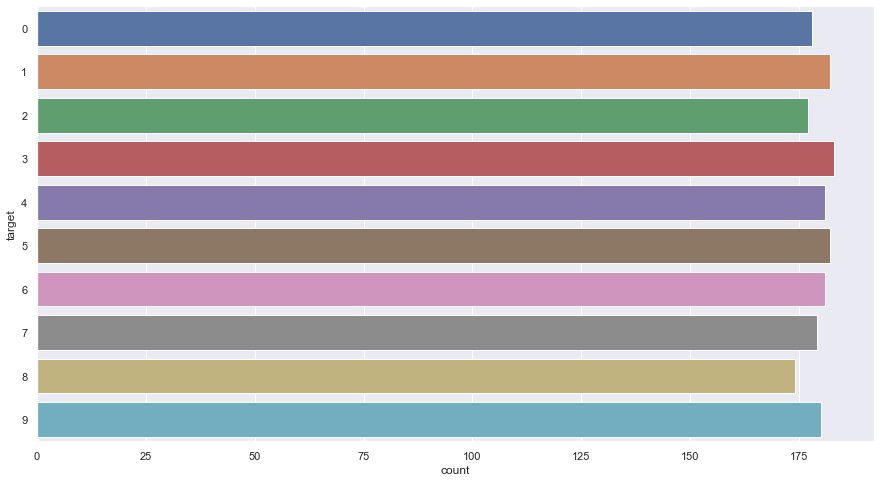

In [10]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(y='target', 
              data=digits,)


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

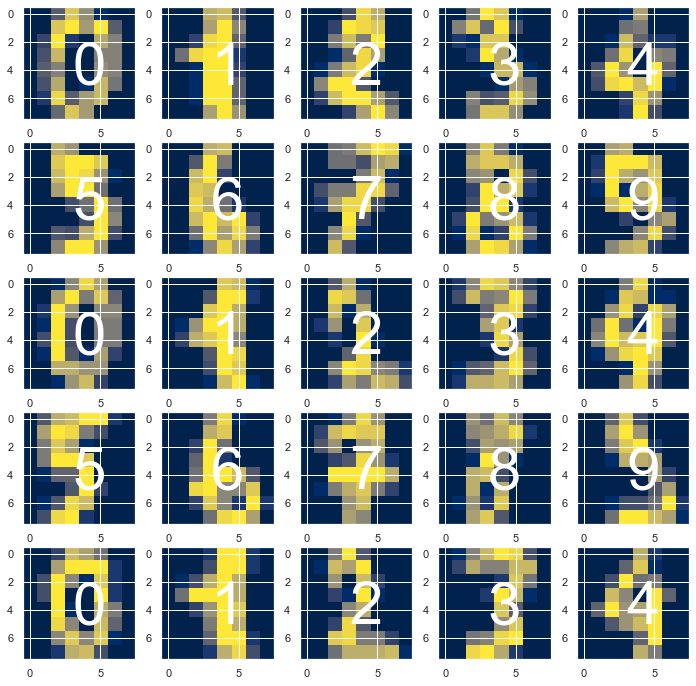

In [12]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for x in range(nx):
    for y in range(ny):
        axs[x,y].imshow(digits_dict["images"][5*x +y], cmap='cividis')
        axs[x,y].text(3,5,s=digits['target'][5*x +y],fontsize=60,color='w')
## FIX ME PLEASE

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [14]:
#Se definen conjuntos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('El largo del conjunto entrenamiento es', len(X_train))
print('El largo del conjunto testeo es', len(X_test))

El largo del conjunto entrenamiento es 1437
El largo del conjunto testeo es 360


### Regresión logística

In [15]:
#Se instancia el modelo Regresión Logistica
from sklearn.linear_model import LogisticRegression
from metrics_classification import *
from sklearn.metrics import confusion_matrix
rlog=LogisticRegression(max_iter=5000)
rlog.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [16]:
#Matriz de confusión
y_true =  list(y_test)
y_pred = list(rlog.predict(X_test))
print(confusion_matrix(y_true,y_pred))

[[31  0  1  0  0  0  0  0  0  0]
 [ 0 41  1  0  1  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  1  0  0]
 [ 0  1  0  0 34  0  0  0  0  0]
 [ 0  1  0  1  0 31  0  0  0  0]
 [ 0  1  0  0  1  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  1]
 [ 0  2  0  0  0  1  0  0 29  1]
 [ 0  0  0  0  0  0  0  0  0 36]]


In [17]:
#Datos acertados
acert1=sum(y_test == rlog.predict(X_test))
print(" Se acertó en", acert1, "datos")

 Se acertó en 345 datos


In [18]:
#Metricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics

,accuracy,recall,precision,fscore
0,0.9583,0.958,0.961,0.9587


### K-Nearest Neighbours

In [19]:
#Se instancia el modelo
from sklearn.neighbors import KNeighborsClassifier
knb=KNeighborsClassifier()
knb.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
#Matriz de confusión
y_true =  list(y_test)
y_pred = list(knb.predict(X_test))
print(confusion_matrix(y_true,y_pred))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  1  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  1  0  0  0  0  0  1 31  0]
 [ 0  1  0  0  0  0  0  0  0 35]]


In [21]:
#Datos acertados
acert2=sum(y_test == knb.predict(X_test))
print("Se acertó en", acert2, "datos")

Se acertó en 356 datos


In [22]:
#Métricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics

,accuracy,recall,precision,fscore
0,0.9889,0.9885,0.9887,0.9883


### Random forest

In [23]:
#Se instancia modelo
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=50)

In [24]:
#Matriz de confusión
y_true =  list(y_test)
y_pred = list(rfc.predict(X_test))
print(confusion_matrix(y_true,y_pred))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  1]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 2  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  1  1  0  0  1  0  1 29  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


In [25]:
#Datos acertados
acert3=sum(y_test == rfc.predict(X_test))
print("Se acertó en", acert3, "datos")

Se acertó en 352 datos


In [26]:
#Metricas
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics

,accuracy,recall,precision,fscore
0,0.9778,0.9781,0.9768,0.9766


In [27]:
#Grid search
from sklearn.model_selection import GridSearchCV

# creación del modelo
model = RandomForestClassifier()

# rango de parametros
rango_criterion = ['gini','entropy']
rango_max_depth =np.array( [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150])
param_grid = dict(criterion=rango_criterion, max_depth=rango_max_depth)
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  15,  20,  30,  40,
         50,  70,  90, 120, 150])}

In [28]:
gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

In [29]:
# imprimir resultados
print(gs.best_score_)
print(gs.best_params_)

0.974946767324816
{'criterion': 'gini', 'max_depth': 90}


### Respuestas

Basado en las métricas el mejor modelo corresponde a K-Nearest Neighbours, las cuales tienen un porcentaje mayor a los otros dos modelos.
Es por esto, y además dado el nivel de acierto mostrado, es que se elige el modelo K-Nearest Neighbours.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [30]:
#cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
precision = cross_val_score(estimator=model,
                            X=X_train,
                            y=y_train,
                            cv=10)
prom=(precision.mean()).round(3)
desv_std=precision.std().round(3)
ic=[prom-desv_std,prom+desv_std]
print('El intervalo de confianza es', ic)
## FIX ME PLEASE

El intervalo de confianza es [0.976, 0.994]


In [31]:
knb.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

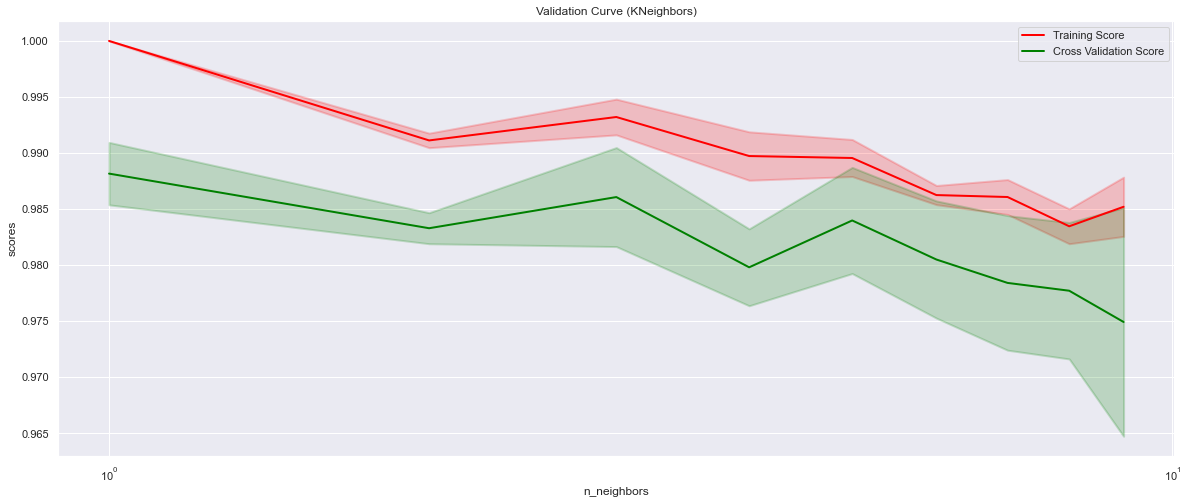

In [32]:
#Cross validation
from sklearn.model_selection import validation_curve
parameters = np.arange(1,10)
train_scores, test_scores = validation_curve(model,
                                             X_train,
                                             y_train,
                                             param_name = 'n_neighbors',
                                             param_range = parameters,
                                             scoring = 'accuracy',
                                             n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

plt.figure(figsize=(20,8))
plt.title('Validation Curve (KNeighbors)')
plt.xlabel('n_neighbors')
plt.ylabel('scores')

plt.semilogx(parameters,train_scores_mean,label = 'Training Score',color = 'red',lw =2)
plt.fill_between(parameters, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,alpha = 0.2,
                 color = 'red', lw = 2)

plt.semilogx(parameters, test_scores_mean, label = 'Cross Validation Score', color = 'green',lw =2)
plt.fill_between(parameters, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.2,
                 color = 'green', lw = 2)

plt.legend(loc = 'best')
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [33]:
#Selección de atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
df = pd.DataFrame(X)
df.columns = [f'c{k}' for k in range(0,X.shape[1])]
df['target']=y

# Separamos las columnas objetivo
x_training = df.drop(['target',], axis=1)
y_training = df['target']

# Aplicando el algoritmo univariante de prueba F.
k = 40  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

C:\Users\javie\Anaconda3\envs\mat281\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Users\javie\Anaconda3\envs\mat281\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [34]:
catrib = seleccionadas.get_support()
df= df[[columnas[i] for i in list(catrib.nonzero()[0])]]
print("Las columnas seleccionadas son:\n",df.columns.tolist())

Las columnas seleccionadas son:
 ['c2', 'c3', 'c5', 'c6', 'c9', 'c10', 'c13', 'c17', 'c18', 'c19', 'c20', 'c21', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c50', 'c51', 'c52', 'c53', 'c54', 'c58', 'c59', 'c60', 'c61', 'c62']


In [35]:
#Extraccion de atributos
#Se escalan los datos
from sklearn.preprocessing import StandardScaler
X1=StandardScaler().fit_transform(df)

In [36]:
#Dataframe Normalizado
df_norm=pd.DataFrame(X1,columns=df.columns)

<AxesSubplot:>

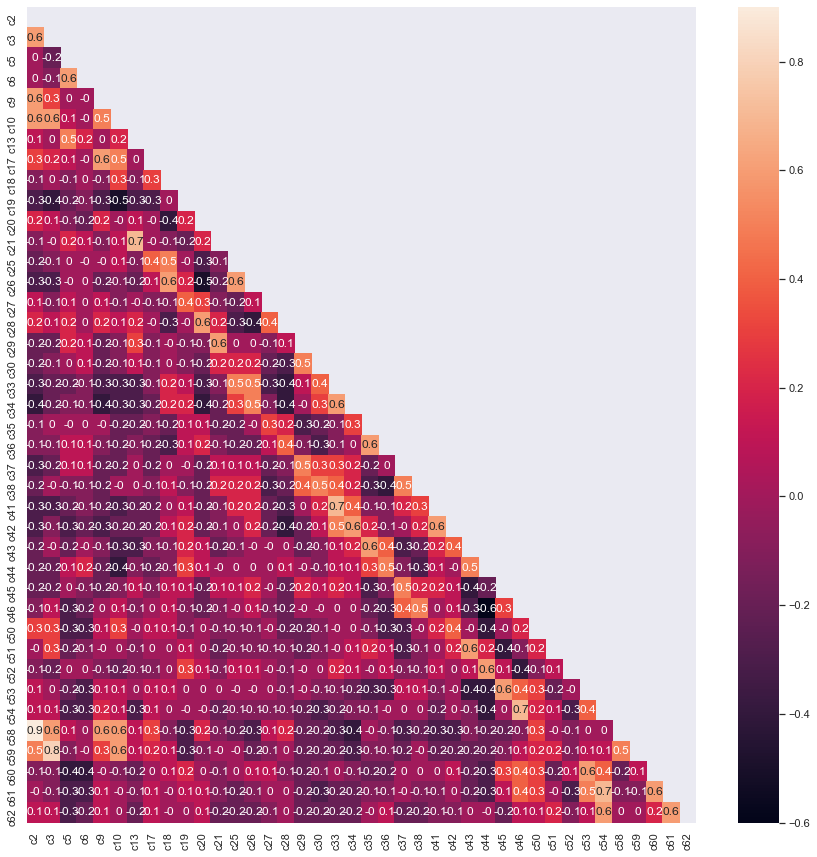

In [37]:
#gráfica de correlación
corr=df_norm.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.set_style(style='white')
sns.heatmap(corr.round(1),
           mask=np.triu(np.ones_like(corr, dtype = bool)),
           annot=True)

In [38]:
#Se aplica PCA
from sklearn.decomposition import PCA
pca = PCA(df.shape[1])
principalComponents = pca.fit_transform(X1)

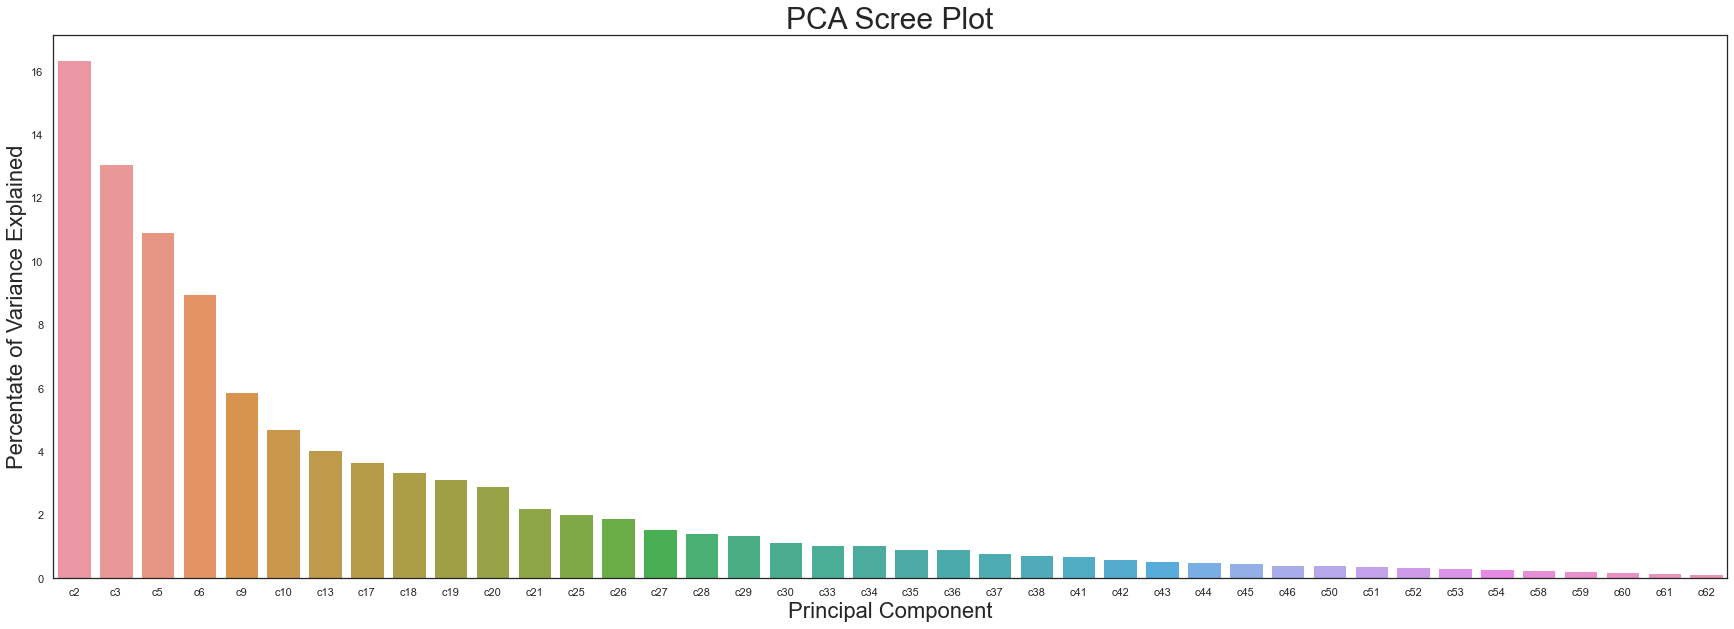

In [39]:
# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columnas = df_norm.columns
plt.figure(figsize=(30,10))
sns.barplot(
    x=columnas,
    y=percent_variance, 
)
plt.ylabel('Percentate of Variance Explained',**{'size':'22'})
plt.xlabel('Principal Component',**{'size':'22'})
plt.title('PCA Scree Plot',**{'size':'30'})
plt.show()

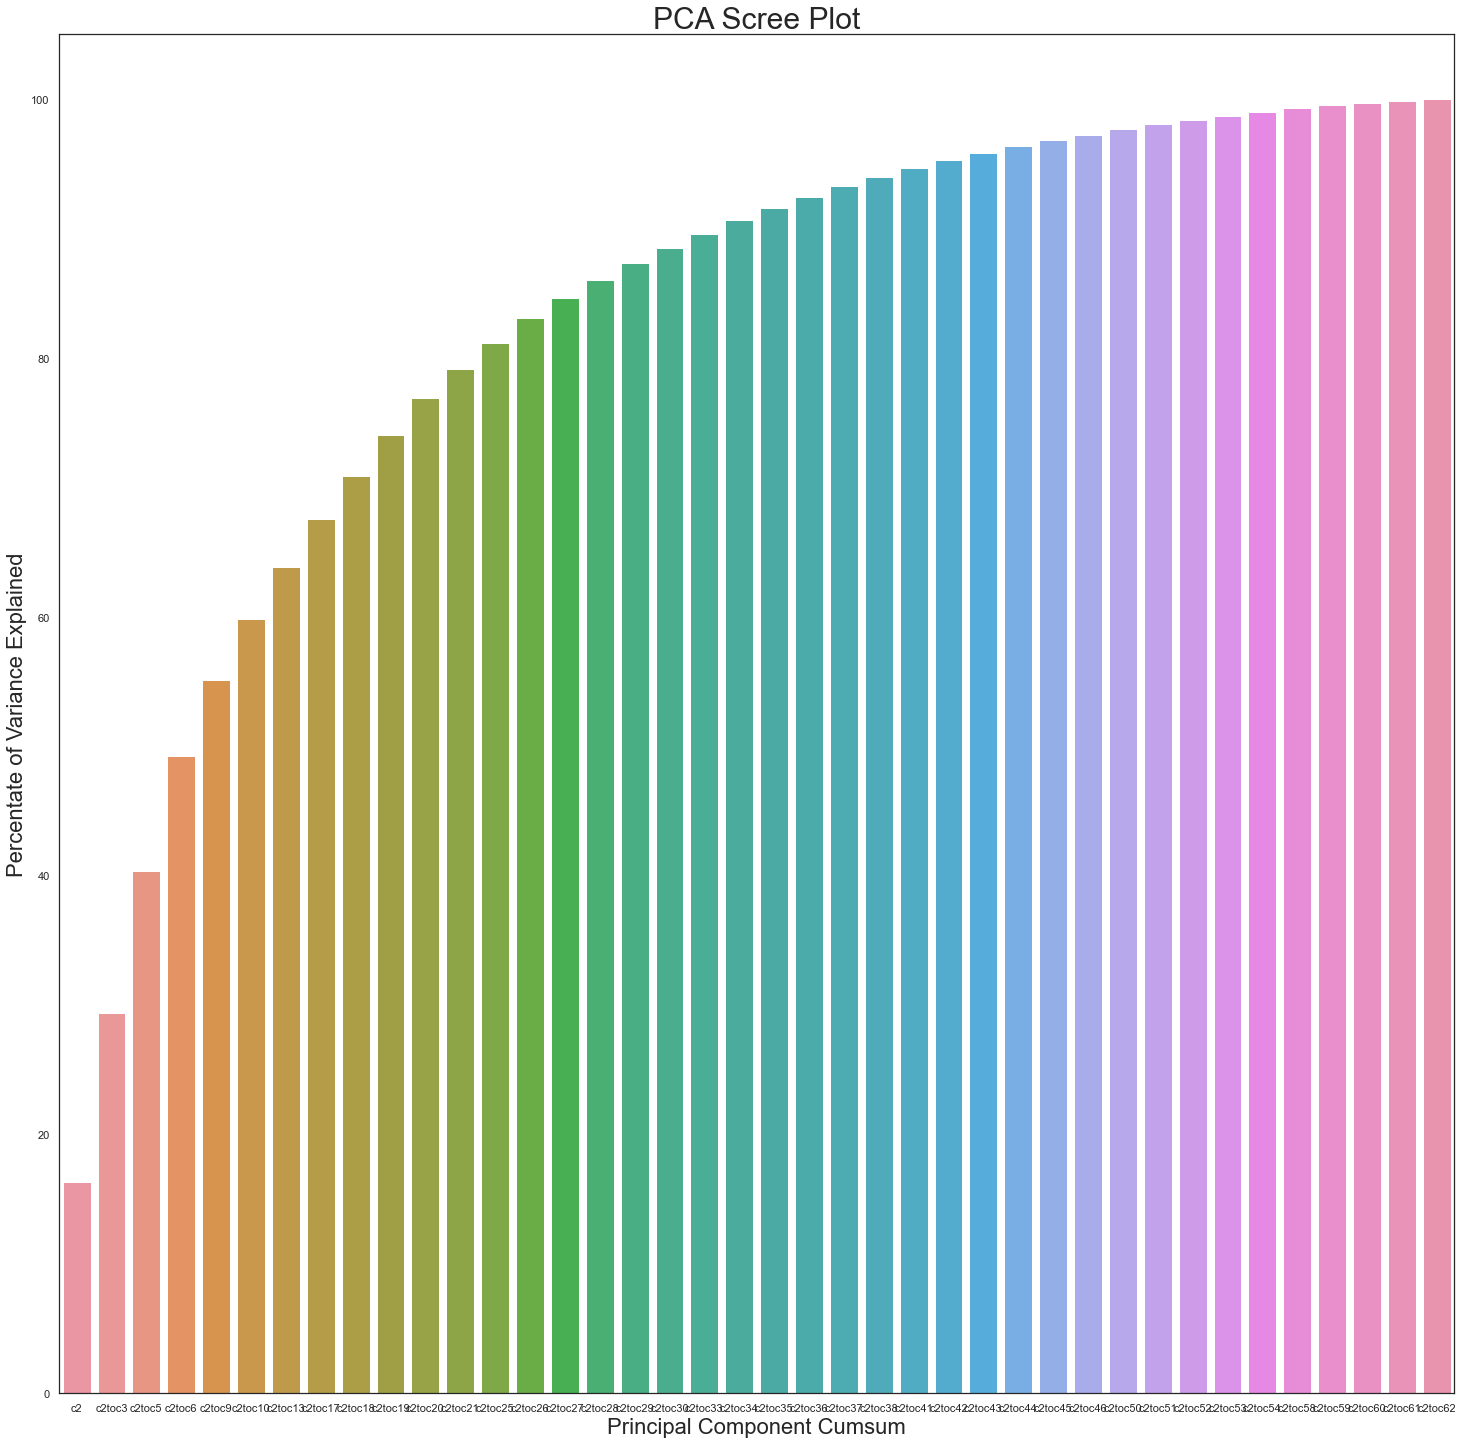

In [40]:
#gráfica varianza acumulada"
percent_variance_cum = np.cumsum(percent_variance)
columnas_1=[columnas[0]]
for i in range(1,len(columnas)):
    columnas_1.append(columnas[0] + 'to' + columnas[i])
plt.figure(figsize=(25,25))
sns.barplot(
    x=columnas_1,
    y=percent_variance_cum, 
)
plt.ylabel('Percentate of Variance Explained',**{'size':'22'})
plt.xlabel('Principal Component Cumsum',**{'size':'22'})
plt.title('PCA Scree Plot',**{'size':'30'})
plt.show()

Ahora, analicemos el comportamiento de nuestro modelo con al reducción de datos.

In [41]:
X2=df
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
print('El largo del conjunto entrenamiento es', len(X_train))
print('El largo del conjunto testeo es', len(X_test))

El largo del conjunto entrenamiento es 1437
El largo del conjunto testeo es 360


In [42]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#matriz de confusión
y_true =  list(y_test)
y_pred = list(knn.predict(X_test))
print(confusion_matrix(y_true,y_pred))

[[44  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 37  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 28  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  2  0  0  0 33]]


In [43]:
#Datos acertados
acert4=sum(y_test == knn.predict(X_test))
print("Se acertó en", acert4, "datos")

Se acertó en 354 datos


In [44]:
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics

,accuracy,recall,precision,fscore
0,0.9833,0.9822,0.9831,0.9824


Claramente,el modelo con todos los datos es mejor que el modelo acotado, lo cual se refleja en las métricas como tambien en la cantidad de datos acertados

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [45]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns = "target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
    model.fit(X_train, y_train) # ajustando el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
    

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation = 'nearest', cmap = 'gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10, color = color)
            ax[i][j].text(7, 0, label_true, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10, color = 'blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

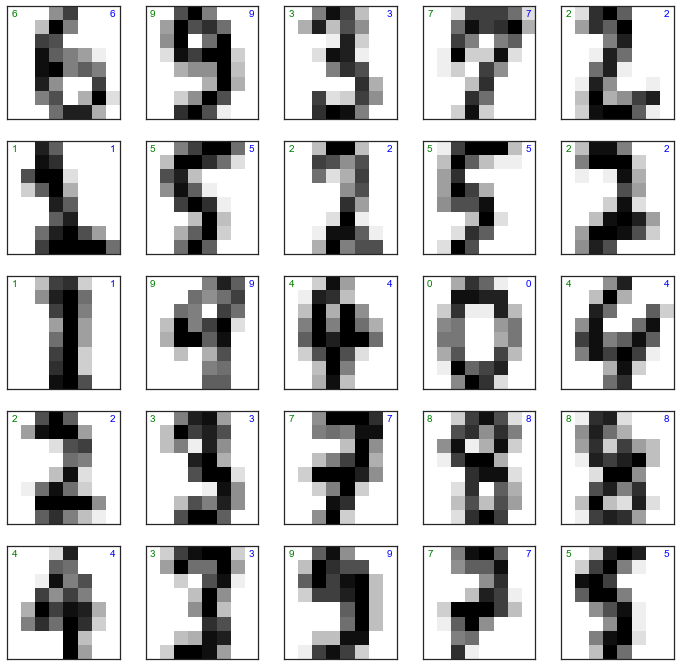

In [46]:
mostar_resultados(digits, KNeighborsClassifier(), nx=5, ny=5,label = "correctos")

IndexError: index 5 is out of bounds for axis 0 with size 5

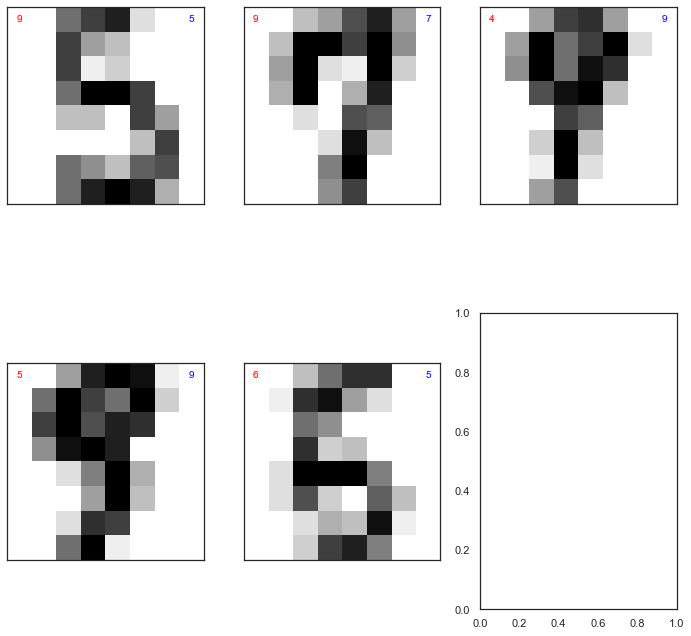

In [47]:
mostar_resultados(digits, KNeighborsClassifier(), nx=2, ny=3,label = "incorrectos")
## FIX ME PLEASE

Estas fallas ocurren por similitudes evidentes entre el valor correcto y el valor entregado por el modelo. Este se podría afinar aun más entrenando el modelo

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En primera instancia, es posible ver que las métricas entregan valores más que aceptables para cada modelo probado. Cuando se desarrollo una disminución en la dimensión de los datos, tambien se pudieron obtener métricas buenas que evidencian el buen comportamiento del modelo en conjunto de datos más pequeños. Respecto a las visualizaciones, se puede acotar que ayudaron de forma importante en obtener un respuesta respecto a cual modelo utilizar, cuantos datos eran necesario analizar para lograr tener métricas aceptable,etc. 
Por último, como trabajo a futuro, claramente es mejorar los métodos para poder descifrar un dígito a partir de una imagen, quizas mejorando los modelos ultilizados en este laboratorio como buscando otras técnicas de machine-learning que nos ayuden a aumentar aun más la cantidad de aciertos.